# 3. ショッピングモール・カテゴリ比較

## 3.1 データの読み込み

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
import matplotlib.ticker as mtick
import seaborn as sns

In [11]:
# データ読み込み
df = pd.read_csv("../data/customer_shopping_data_2022.csv")

# 「invoice_date」を日付型に変換
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

In [12]:
# 先頭確認
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_amount,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,20s
1,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,20s
2,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,40s
3,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,20.92,30s
4,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall,15.15,20s


## 3.2 モールごとに売上高と取引件数を集計・可視化

### 3.2.1 売上高と取引件数の集計

In [39]:
# モール別の売上と取引件数を集計
mall_sales = df.groupby("shopping_mall").agg(
    total_sales = ("total_amount", "sum"),
    transaction_count = ("invoice_no", "count"),
    customer_count = ("customer_id", "nunique")
).sort_values("total_sales", ascending=False)
# 確認
mall_sales.head()

,total_sales,transaction_count,customer_count
shopping_mall,,,
Mall of Istanbul,23410362.30,9202,9202
Kanyon,22922200.33,9153,9153
Metrocity,17244618.86,6890,6890
Istinye Park,11469526.74,4521,4521
Metropol AVM,11375841.00,4613,4613


### 3.2.2 棒グラフで可視化・画像を保存

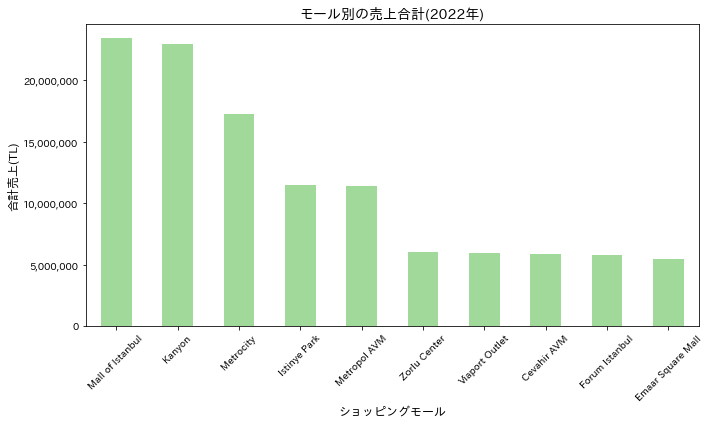

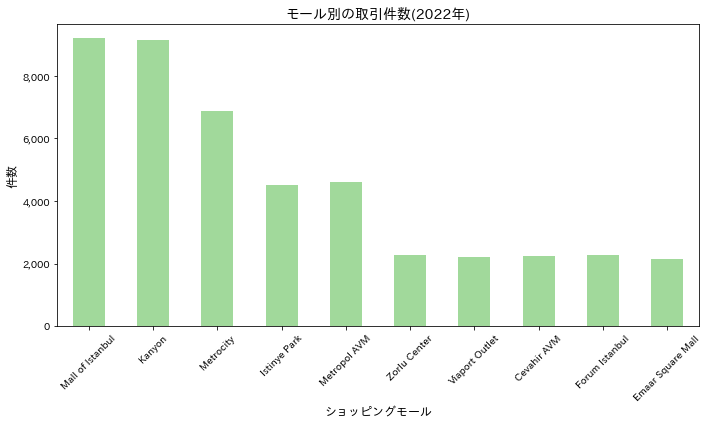

In [33]:
# 各集計項目を棒グラフで可視化
# 取引件数と顧客数は同値であるため、ここでは取引件数のみを可視化

# グラフサイズ統一化
figsize = (10, 6)

# カンマ区切りのフォーマッター
formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")

# カラム名とタイトルの対応
plot_items = {
    "total_sales" : "モール別の売上合計(2022年)",
    "transaction_count" : "モール別の取引件数(2022年)"
}

# 各指標を個別に描画

for i, (col, title) in enumerate(plot_items.items(), start=4):
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    mall_sales[col].plot(kind="bar", color="#a1d99b", ax=ax)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("ショッピングモール", fontsize=12)
    ax.set_ylabel("件数" if col != "total_sales" else "合計売上(TL)", fontsize=12)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", rotation=45)
    
    plt.tight_layout()
    plt.savefig(f"../output/{i:02d}_mall_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()

## 3.3 カテゴリーごとに売上高と取引件数を集計・可視化

### 3.3.1 売上高と取引件数の集計

In [43]:
# カテゴリ別の売上と取引件数を集計
category_sales = df.groupby("category").agg(
    total_sales = ("total_amount", "sum"), 
    transaction_count = ("invoice_no", "count"),
    customer_count = ("customer_id", "nunique")
).sort_values("total_sales", ascending=False)
# 確認
category_sales.head()

,total_sales,transaction_count,customer_count
category,,,
Clothing,51753897.36,15560,15560
Shoes,30944765.20,4591,4591
Technology,26651100.00,2316,2316
Cosmetics,3150499.44,6972,6972
Toys,1861888.00,4678,4678


### 3.3.2 棒グラフで可視化・画像を保存

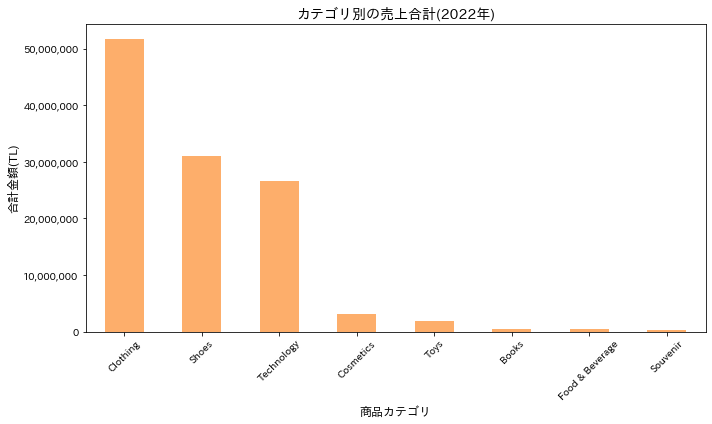

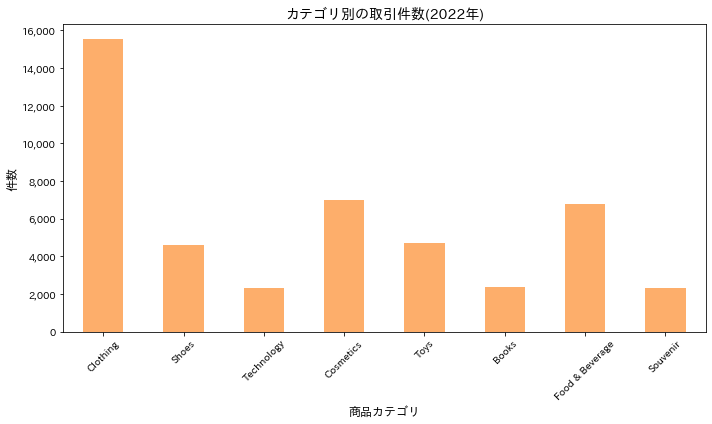

In [68]:
# 集計結果を可視化

# グラフサイズ、フォーマッタ
figsize = (10, 6)
formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")

# 表示項目とタイトル
plot_items = {
    "total_sales" : "カテゴリ別の売上合計(2022年)",
    "transaction_count" : "カテゴリ別の取引件数(2022年)"
}

# グラフの描画と保存
for i, (col, title) in enumerate(plot_items.items(), start=6):
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    category_sales[col].plot(kind="bar", color="#fdae6b", ax=ax)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("商品カテゴリ", fontsize=12)
    ax.set_ylabel("合計金額(TL)" if col == "total_sales" else "件数", fontsize=12,)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", rotation=45)
    
    plt.tight_layout()
    fig.savefig(f"../output/{i:02d}_category_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()

## 3.4 モール×カテゴリのクロス集計

### 3.4.1 モール×カテゴリで売上高をクロス集計

In [56]:
# モール別×カテゴリ別のクロス集計
# 合計金額
mall_category_sales = pd.pivot_table(data=df,
              index="shopping_mall",
              columns="category",
              values="total_amount",
              aggfunc="sum",
              fill_value=0
              )
# 確認
mall_category_sales.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,17861.85,2460656.00,148693.62,19957.68,1376189.81,14298.87,1699950,94187.52
Emaar Square Mall,19831.35,2585789.36,153410.18,19366.69,1276561.59,14334.06,1277850,76769.28
Forum Istanbul,18982.95,2661109.44,159834.46,19220.25,1695480.25,18850.11,1134000,92789.76
Istinye Park,35223.75,5261902.80,300314.76,38712.46,3082473.12,30181.29,2517900,202818.56
Kanyon,78234.60,10173312.16,644948.92,76828.70,6164346.07,57664.68,5353950,372915.20


### 3.4.2 モール×カテゴリで取引件数をクロス集計

In [57]:
# 取引件数
mall_category_count = pd.pivot_table(data=df,
              index="shopping_mall",
              columns="category",
              values="invoice_no",
              aggfunc="count",
              fill_value=0
              )
# 確認
mall_category_count.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,110,732,331,359,211,104,138,246
Emaar Square Mall,110,755,345,318,208,108,117,198
Forum Istanbul,119,800,356,320,207,138,111,230
Istinye Park,217,1530,667,691,469,230,223,494
Kanyon,488,3100,1405,1373,939,478,455,915


### 3.4.3 それぞれヒートマップで可視化・画像を保存

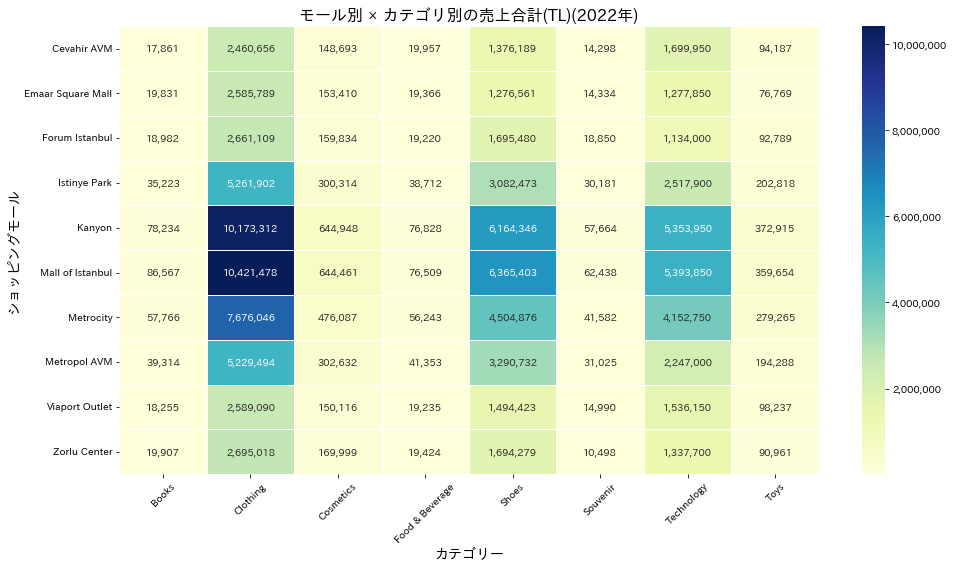

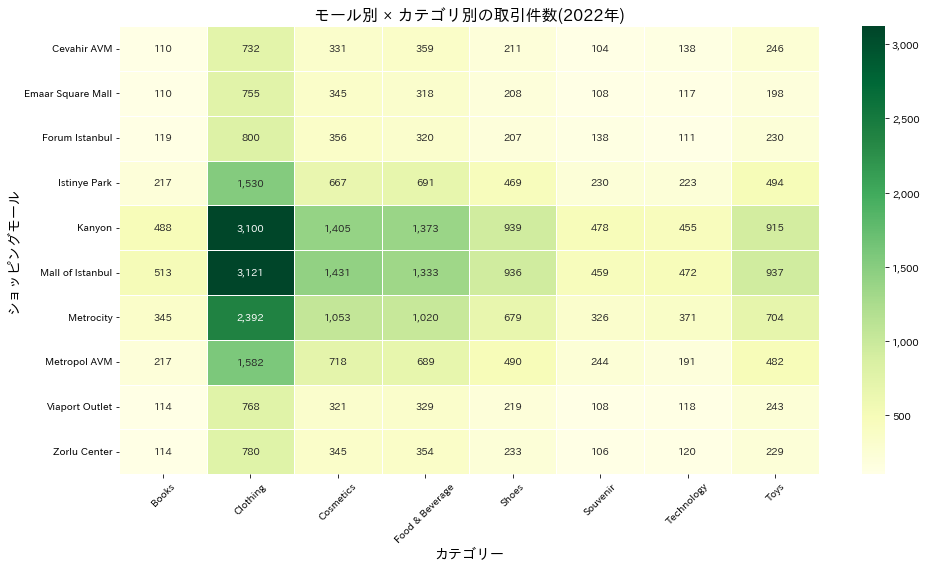

In [69]:
# ヒートマップによる可視化

figsize = (14, 8)
xlabel = "カテゴリー"
ylabel = "ショッピングモール"
formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")

# 売上合計のヒートマップ
fig,ax = plt.subplots(figsize=figsize, facecolor="white")

# 数値をカンマ付き文字列に変換（同じ形のDataFrameを作る）
annot_df = mall_category_sales.applymap(lambda x: f"{int(x):,}")

sns.heatmap(mall_category_sales,
            annot=annot_df, 
            fmt="",
            cmap="YlGnBu", 
            linewidth=0.5, 
            ax=ax
)

# 見た目調整
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(formatter)
ax.set_title("モール別 × カテゴリ別の売上合計(TL)(2022年)", fontsize=16)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 出力と保存
plt.tight_layout()
plt.savefig("../output/08_mall_category_sales_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()



# 取引件数のヒートマップ
fig, ax = plt.subplots(figsize=figsize, facecolor="white")

# 数値をカンマ付き文字列に変換（同じ形のDataFrameを作る）
annot_df = mall_category_count.applymap(lambda x: f"{int(x):,}")

sns.heatmap(mall_category_count, 
            annot=annot_df, 
            fmt="",
           cmap="YlGn", 
            linewidths=0.5, 
            ax=ax
)

# 見た目調整
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(formatter)
ax.set_title("モール別 × カテゴリ別の取引件数(2022年)", fontsize =16)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 出力と保存
plt.tight_layout()
plt.savefig("../output/09_mall_category_count_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

## モール別 × カテゴリ別のクロス集計について

これまで性別、年代、決済方法、カテゴリ、モールといった各項目ごとに、集計と可視化を行ってきた。  
その中で、特にカテゴリ別の売上合計に、非常に大きな偏りがある事が分かった。モール別の売上合計の結果に関しても有意な差が見られた。そこで、この時点で両者を掛け合わせた二次元的な分析を試みることとした。

### 考察メモ
モールによって特定のカテゴリの売り上げが突出して大きくなっていることが確認できた。
具体的には、**「Mall of Istanbul」、「Kanyon」、「Metrocity」といった店舗において特に、衣料品、靴、電化製品系の売上が明らかに高くなっている。**
これは、立地や店舗構成、来店層の違いなどが背景にある可能性がある。

### 保存ファイル
- グラフ画像は`output/`ディレクトリにそれぞれ保存済み